# Função Cumulativa de Distribuição (CDF) e Teste KS
Este notebook demonstra visualmente os conceitos da Função Cumulativa de Distribuição e a aplicação do Teste de Kolmogorov-Smirnov para comparar distribuições.

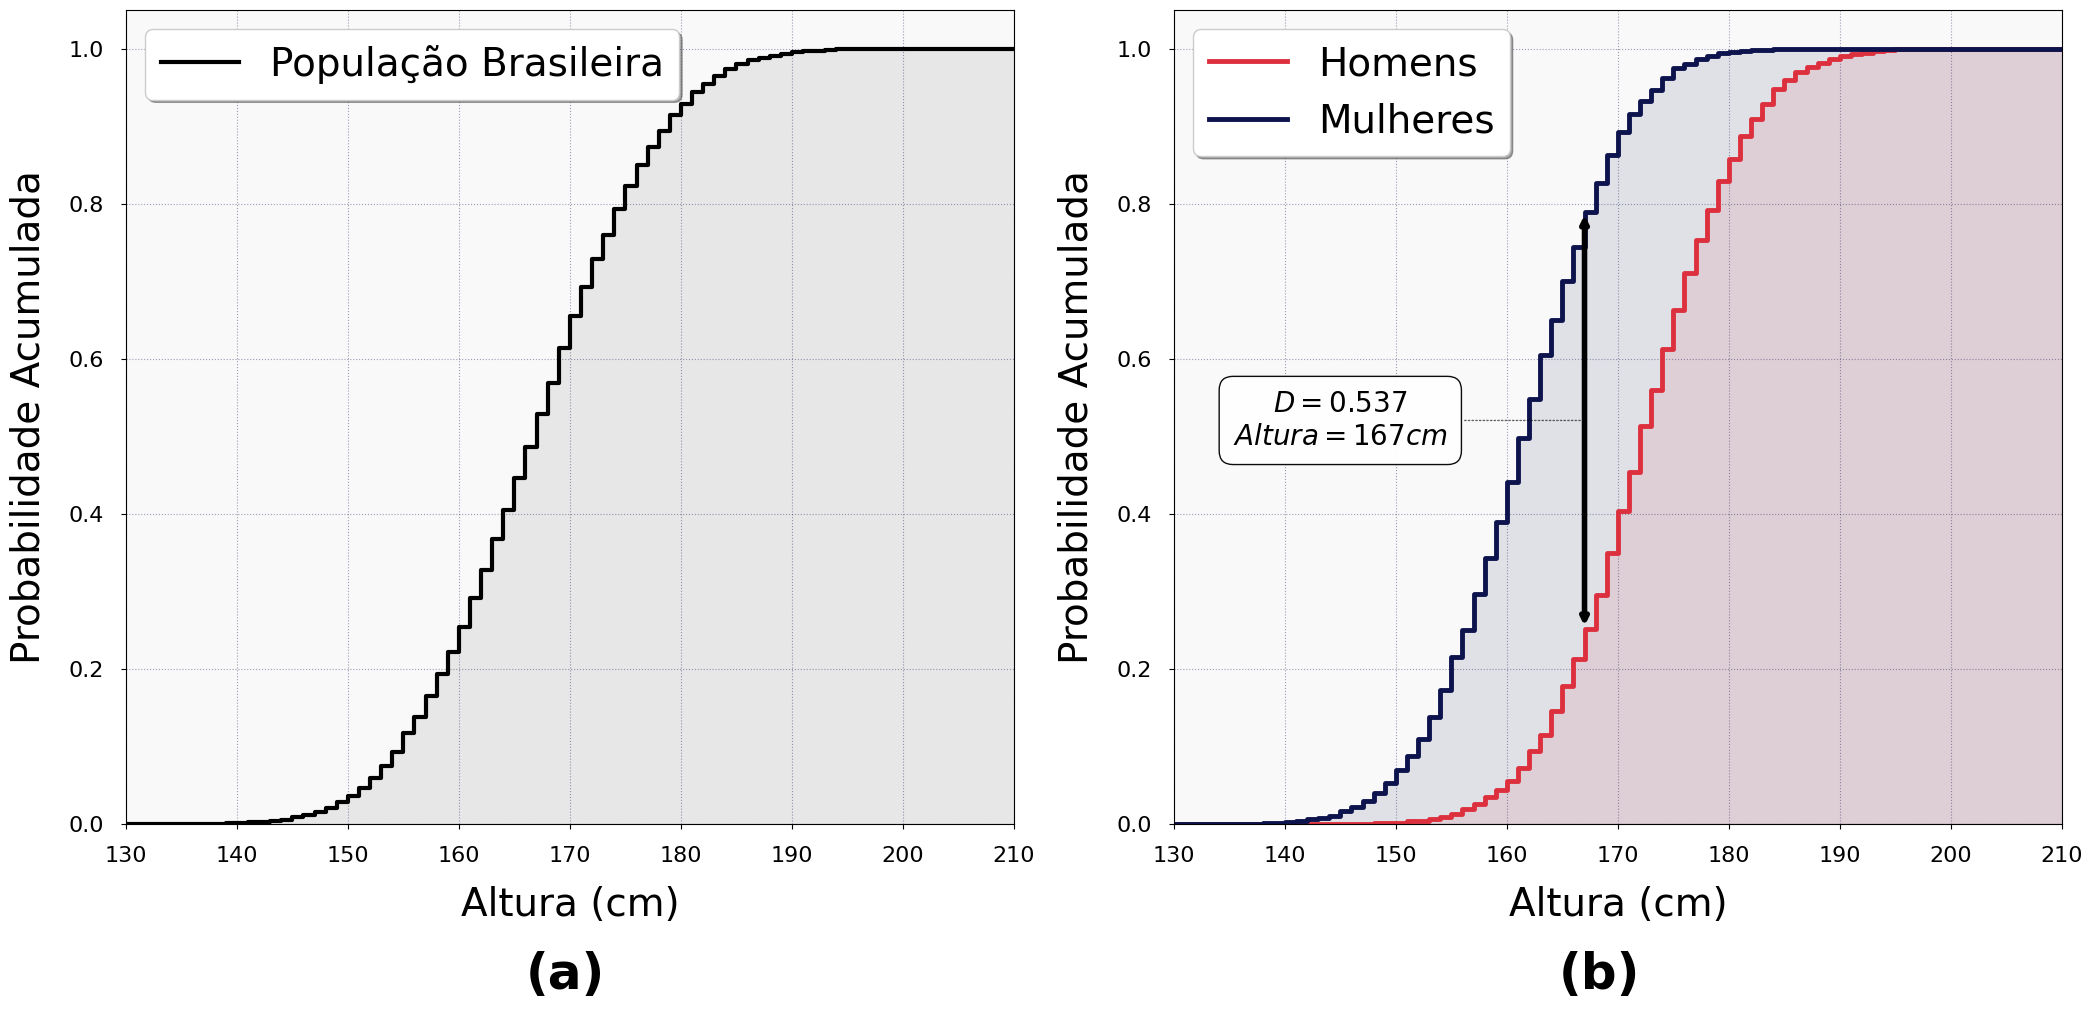

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Definição das cores (Paleta GRAN com foco no contraste profissional)
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"

# 2. Definição de tamanhos de fonte (Otimizados para leitura em PDF)
FONT_LABEL = 28
FONT_LEGEND = 28
FONT_TICK = 16
FONT_ANNOTATION = 20
FONT_SUBFIGURE = 36

# 3. Geração de dados (seed=28)
np.random.seed(28)
n_total = 10000
p_mulheres = 0.515
n_mulheres = int(n_total * p_mulheres)
n_homens = n_total - n_mulheres

# Parâmetros base da população
mu_h, sigma_h = 172, 7.6
mu_m, sigma_m = 161, 7.3

# Amostras puras baseadas na distribuição normal
alturas_h = np.random.normal(mu_h, sigma_h, n_homens)
alturas_m = np.random.normal(mu_m, sigma_m, n_mulheres)
alturas_total = np.concatenate([alturas_h, alturas_m])

# Função para ECDF discretizada em 1cm
def get_discretized_ecdf(data, start=130, end=215):
    bins = np.arange(start, end + 1, 1)
    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    cdf = np.cumsum(counts) * np.diff(bin_edges)
    return bin_edges, np.insert(cdf, 0, 0)

# 4. Configuração da Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 11), facecolor=COR_BRANCO)

# --- Figura (a): CDF População Total ---
edges_t, cdf_t = get_discretized_ecdf(alturas_total)
ax1.step(edges_t, cdf_t, where='post', color=COR_PRETO, lw=3, label='População Brasileira')
ax1.fill_between(edges_t, cdf_t, step="post", color=COR_PRETO, alpha=0.07)

# Labels e eixos em PRETO conforme solicitado (labelpad adicionado para espaçamento)
ax1.set_xlabel('Altura (cm)', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax1.set_ylabel('Probabilidade Acumulada', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax1.legend(fontsize=FONT_LEGEND, frameon=True, shadow=True)
ax1.grid(True, linestyle=':', alpha=0.4, color=COR_AZUL_PRINCIPAL)
ax1.set_facecolor('#F9F9F9')

# --- Figura (b): CDFs por Gênero e Teste KS ---
edges_h, cdf_h = get_discretized_ecdf(alturas_h)
edges_m, cdf_m = get_discretized_ecdf(alturas_m)

# Cores: Homens = Vermelho, Mulheres = Azul
ax2.step(edges_h, cdf_h, where='post', color=COR_VERMELHO, lw=3.5, label='Homens')
ax2.fill_between(edges_h, cdf_h, step="post", color=COR_VERMELHO, alpha=0.1)

ax2.step(edges_m, cdf_m, where='post', color=COR_AZUL_PRINCIPAL, lw=3.5, label='Mulheres')
ax2.fill_between(edges_m, cdf_m, step="post", color=COR_AZUL_PRINCIPAL, alpha=0.1)

# Cálculo da distância máxima D (KS)
diff_binned = np.abs(cdf_h - cdf_m)
idx_max = np.argmax(diff_binned)
d_max_val = diff_binned[idx_max]
x_at_d = edges_h[idx_max]
y_h, y_m = cdf_h[idx_max], cdf_m[idx_max]

# Seta de distância D
ax2.annotate('', xy=(x_at_d, y_h), xytext=(x_at_d, y_m),
             arrowprops=dict(arrowstyle='<->', color=COR_PRETO, lw=4, zorder=15))

# Bloco de anotação da distância D deslocado para a esquerda (INCLUINDO A ALTURA AQUI)
x_pos_text = 145
y_pos_text = (y_h + y_m) / 2
ax2.annotate(f'$D = {d_max_val:.3f}$\n$Altura = {x_at_d:.0f} cm$', 
             xy=(x_at_d, y_pos_text), 
             xytext=(x_pos_text, y_pos_text),
             fontsize=FONT_ANNOTATION, fontweight='normal', color=COR_PRETO,
             va='center', ha='center',
             bbox=dict(facecolor='white', alpha=0.95, edgecolor=COR_PRETO, boxstyle='round,pad=0.5'),
             arrowprops=dict(arrowstyle='-', color=COR_PRETO, linestyle=':', alpha=0.6),
             zorder=16)

# Labels e eixos em PRETO conforme solicitado (labelpad adicionado para espaçamento)
ax2.set_xlabel('Altura (cm)', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax2.set_ylabel('Probabilidade Acumulada', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax2.legend(fontsize=FONT_LEGEND, frameon=True, shadow=True)
ax2.grid(True, linestyle=':', alpha=0.4, color=COR_AZUL_PRINCIPAL)
ax2.set_facecolor('#F9F9F9')

# Formatação global dos eixos
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', which='major', labelsize=FONT_TICK, pad=12, labelcolor=COR_PRETO)
    ax.set_xlim(130, 210)
    ax.set_ylim(0, 1.05)

# 5. Indicadores de subfigura (a) e (b) em PRETO no rodapé
fig.text(0.28, 0.05, '(a)', fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')
fig.text(0.75, 0.05, '(b)', fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')

# Ajuste manual e definitivo das margens externas e espaçamento entre os subplots
plt.subplots_adjust(left=0.08, right=0.96, top=0.94, bottom=0.20, wspace=0.18)

# 6. Salvamento da imagem
caminho_arquivo = os.path.join('..', 'outputs', 'figures', 'aula_03')
os.makedirs(caminho_arquivo, exist_ok=True) # Garante que a pasta existe
plt.savefig(os.path.join(caminho_arquivo, 'ks_discreto_final.png'), format='png', dpi=300)

plt.show()